In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
import os
os.getcwd()

'C:\\Users\\ADMIN\\Desktop\\DSL'

In [225]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [226]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [227]:
def load_data():
    data = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\DSL\\[0804] Supervised_learning\\0804_supervised_learning\\data\\train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [228]:
train_x, train_y, test_x, test_y = load_data()

In [229]:
train_x

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0
...,...,...,...,...,...
83,23.9,2.8,68.0,0.0,0.6
84,25.0,3.1,63.0,0.0,0.8
85,26.0,3.1,60.0,0.0,1.0
86,26.4,3.8,60.0,0.0,1.0


array([[<AxesSubplot:xlabel='Temp', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Temp'>,
        <AxesSubplot:xlabel='Precipitation', ylabel='Temp'>,
        <AxesSubplot:xlabel='Sun', ylabel='Temp'>],
       [<AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Wind'>,
        <AxesSubplot:xlabel='Precipitation', ylabel='Wind'>,
        <AxesSubplot:xlabel='Sun', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Temp', ylabel='Moisture'>,
        <AxesSubplot:xlabel='Wind', ylabel='Moisture'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Moisture'>,
        <AxesSubplot:xlabel='Precipitation', ylabel='Moisture'>,
        <AxesSubplot:xlabel='Sun', ylabel='Moisture'>],
       [<AxesSubplot:xlabel='Temp', ylabel='Precipitation'>,
        <AxesSubplot:xlabel='Wind', ylabel='Precipitation'>,
        <AxesSubplot:xlabel='Moisture',

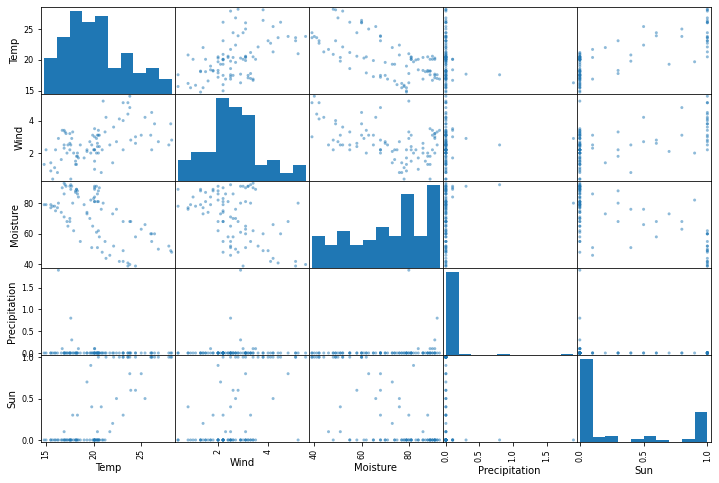

In [230]:
from pandas.plotting import scatter_matrix

attributes = ["Temp","Wind","Moisture","Precipitation","Sun"]
scatter_matrix(train_x, figsize=(12, 8))

train_x = train_x.loc[:,['Temp','Moisture','Wind']]
train_x

In [232]:
#Scatter_matrix를 사용해 보았을때 Temp, Wind 그리고 Moisture가 서로 높은 상관관계를 가지고 있는 것으로 파악되어 사용할 변수로 선택 하였습니다.

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_x)
processed_data = scaler.transform(train_x)
processed_data

array([[0.20895522, 0.98148148, 0.41176471],
       [0.21641791, 0.96296296, 0.49019608],
       [0.20149254, 0.96296296, 0.54901961],
       [0.17164179, 0.96296296, 0.54901961],
       [0.1641791 , 0.98148148, 0.56862745],
       [0.15671642, 1.        , 0.58823529],
       [0.14179104, 0.94444444, 0.58823529],
       [0.15671642, 0.87037037, 0.37254902],
       [0.2238806 , 0.75925926, 0.56862745],
       [0.3358209 , 0.62962963, 0.33333333],
       [0.42537313, 0.42592593, 0.58823529],
       [0.54477612, 0.24074074, 0.62745098],
       [0.61940299, 0.18518519, 0.70588235],
       [0.61940299, 0.05555556, 0.92156863],
       [0.65671642, 0.        , 0.92156863],
       [0.67164179, 0.01851852, 1.        ],
       [0.71641791, 0.        , 0.50980392],
       [0.65671642, 0.03703704, 0.78431373],
       [0.58955224, 0.05555556, 0.7254902 ],
       [0.48507463, 0.09259259, 0.74509804],
       [0.37313433, 0.22222222, 0.41176471],
       [0.28358209, 0.2962963 , 0.41176471],
       [0.

In [235]:
preprocessd_data = MinMaxScaler().fit_transform(train_x)
preprocessd_data

array([[0.20895522, 0.98148148, 0.41176471],
       [0.21641791, 0.96296296, 0.49019608],
       [0.20149254, 0.96296296, 0.54901961],
       [0.17164179, 0.96296296, 0.54901961],
       [0.1641791 , 0.98148148, 0.56862745],
       [0.15671642, 1.        , 0.58823529],
       [0.14179104, 0.94444444, 0.58823529],
       [0.15671642, 0.87037037, 0.37254902],
       [0.2238806 , 0.75925926, 0.56862745],
       [0.3358209 , 0.62962963, 0.33333333],
       [0.42537313, 0.42592593, 0.58823529],
       [0.54477612, 0.24074074, 0.62745098],
       [0.61940299, 0.18518519, 0.70588235],
       [0.61940299, 0.05555556, 0.92156863],
       [0.65671642, 0.        , 0.92156863],
       [0.67164179, 0.01851852, 1.        ],
       [0.71641791, 0.        , 0.50980392],
       [0.65671642, 0.03703704, 0.78431373],
       [0.58955224, 0.05555556, 0.7254902 ],
       [0.48507463, 0.09259259, 0.74509804],
       [0.37313433, 0.22222222, 0.41176471],
       [0.28358209, 0.2962963 , 0.41176471],
       [0.

In [236]:
print(train_x.shape)

(88, 3)


In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
linear_model = LinearRegression().fit(preprocessd_data, train_y)

In [239]:
esti_y = linear_model.predict(preprocessd_data)

linear_beta = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 1002.6428
Intercept :  7423.6186


In [240]:
esti_y =  linear_model.predict(preprocessd_data)
esti_y

array([8128.72126472, 8132.26743139, 8120.99756121, 8091.06792455,
       8093.6800048 , 8096.29208504, 8054.73874663, 8020.70406163,
       8047.18519778, 8082.60166246, 8090.91077411, 8124.46421923,
       8177.62638833, 8129.13465135, 8139.95817709, 8168.71243298,
       8173.95281336, 8149.06231146, 8086.88852085, 8001.09212199,
       7929.9578252 , 7875.62027533, 7879.12504446, 7879.92522047,
       7883.28120812, 7870.08689648, 7860.19745716, 7836.61109315,
       7836.66736176, 7789.21709514, 7815.26675792, 7825.09992862,
       7854.63948946, 7890.22475998, 7866.97735647, 7927.48802432,
       7930.02246277, 7904.83574673, 7982.24217648, 7981.98085777,
       8027.80939919, 8080.01610868, 8050.62532933, 8060.92486883,
       8068.90989105, 8085.85026617, 8092.69615187, 8108.4048776 ,
       8107.82462275, 8121.76284179, 8138.40565394, 8132.24740703,
       8109.50261657, 8115.90215783, 8076.26810759, 8137.02522308,
       8191.06520998, 8205.41487803, 8276.00516422, 8323.85065

In [241]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [242]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.5f}")

Linear 3027.93929


In [281]:
test_x = test_x[['Temp','Moisture','Wind']]

In [283]:
pred_y = linear_model.predict(test_x)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [284]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [285]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 3644017805.53551


In [286]:
score(train_mse,test_mse)

 1203464.6211


In [287]:
from sklearn.linear_model import Ridge

In [288]:
ridge_model = Ridge(random_state=123).fit(processed_data, train_y)

In [289]:
esti_y = ridge_model.predict(train_x)
esti_y

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([48083.69133038, 47891.15074864, 47774.14588832, 47486.87196349,
       47723.79938203, 47960.72680057, 46917.48424101, 45763.9960329 ,
       44699.92484306, 43571.59392612, 41250.26762006, 39418.43273023,
       39272.52141459, 37271.09272887, 36730.57953775, 37209.59450199,
       37118.7026728 , 37268.17503099, 36895.04513043, 36498.20082567,
       37369.08808912, 37706.74044419, 39258.70396563, 40555.1857915 ,
       41887.97662912, 42429.28936256, 42540.33455341, 42334.55601947,
       42535.17442625, 42067.95452725, 42291.48779592, 41979.82419829,
       41810.19847844, 41283.72278184, 39771.78551236, 41423.64250406,
       43587.13815552, 40788.39596984, 37853.26318053, 37232.85368315,
       37234.29657012, 39645.03989445, 40033.83829811, 40762.37528845,
       41692.33022789, 42940.70797675, 43880.33982586, 45119.84020736,
       46188.27198205, 46742.8226677 , 47552.85504892, 47508.46821212,
       46854.66740086, 47136.78119852, 46997.66101862, 47324.80499775,
      

In [290]:
ridge_beta = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_
print(f"Beta :{ridge_beta: .4f}")
print(f"Intercept : {ridge_intercept: .4f}")

Beta : 718.1848
Intercept :  7633.7995


In [291]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [292]:
ridge_mse = mse(pred_y, y)
print(f"Ridge {ridge_mse:.5f}")

Ridge 33083213148013.55469


In [293]:
score(ridge_mse,ridge_mse)

 1.0000


In [ ]:
#linear 를 해보고 그와 비교해보기 위해 Ridge도 시도 해보았으나 제대로 된건지 모르겠습니다...